# Image Augmentation using Keras

Image augmentation is a useful technique to build Convolutional Neural Networks (CNN) that can increase the size of the training set without acquiring new images.


- Reading image using matplotlib library
- Rotating image
- Brightness, Shear and Zoom
- Converting image to Gray Scale

In [1]:
# %config IPCompleter.greedy = True

In [2]:
# importing libraries & packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib.pyplot import imread, imshow, subplots, show

%matplotlib inline
warnings.filterwarnings('ignore')

#plt.style.use('seaborn-whitegrid')    # grids in the plots

## Read the image

In [3]:
# reading an image
image = imread('./data/home-4.jpg')

In [4]:
# getting shape of the image
image.shape[0], image.shape[1], image.shape[2]

(720, 1280, 3)

In [5]:
# creating a dataset which contains just one image
images = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

In [6]:
# printing type
print(type(images))

<class 'numpy.ndarray'>


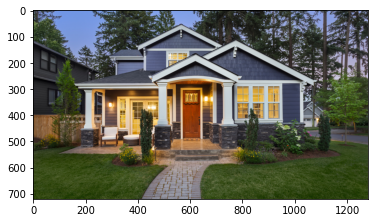

In [7]:
# showing image
imshow(images[0])
show()

In [8]:
# creating a function to fit and plot images defined by the data_generator parameter
def plot(data_generator, nimages = 4):
    """
    Plots 4 images generated by an object of the ImageDataGenerator class.
    """
    data_generator.fit(images)
    image_iterator = data_generator.flow(images)
    
    # plot the images given by the iterator
    fig, rows = subplots(nrows=1, ncols = nimages, figsize=(18,18))
    for row in rows:
        row.imshow(image_iterator.next()[0].astype('int'))
        row.axis('off')
    show()

## Image Rotation

`rotation_range` - randomly rotates the image between positive and negative range in degrees.

In [9]:
# defining data generator
data_generator = ImageDataGenerator(rotation_range = 45)

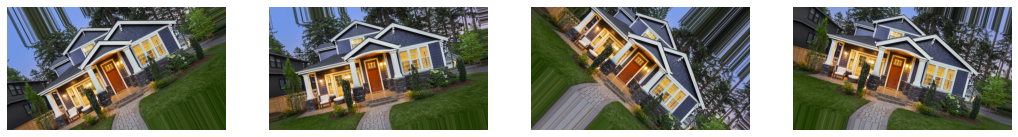

In [10]:
# plotting images
plot(data_generator)

## Width Shifting

`width_shift` - randomly shifts the image to the left or the right by a fraction of the total width provided by the upper bound of a number between 0.0 and 1.0.

In [11]:
# defining data generator
data_generator = ImageDataGenerator(width_shift_range=0.3)

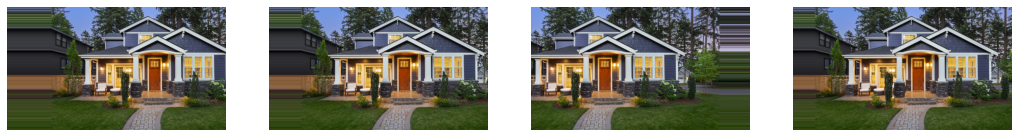

In [12]:
# plotting images
plot(data_generator)

## Height Shifting

`height_shift` - randomly shifts the image to the virtically by a fraction of the total width provided by the upper bound of a number between 0.0 and 1.0.

In [13]:
# defining data generator
data_generator = ImageDataGenerator(height_shift_range=0.4)

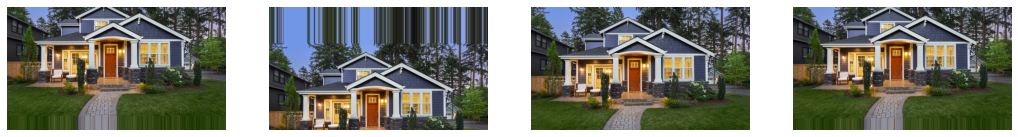

In [14]:
# plotting images
plot(data_generator)

## Brightness

`brightness_range` - The brightness_range specifies the range for randomly picking a brightness shift value from. A brightness of 0.0 corresponds to absolutely no brightness, and 1.0 corresponds to maximum brightness.

In [15]:
# defining data generator
data_generator = ImageDataGenerator(brightness_range=(0.1, 0.6))

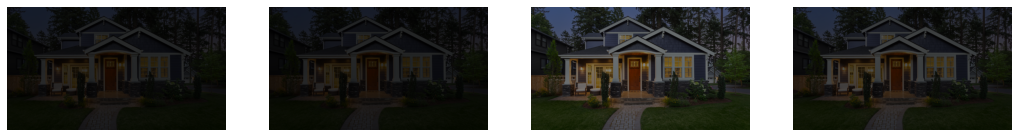

In [16]:
# plotting images
plot(data_generator)

## Shear

`shear_range` - Unlike rotation where the angle of the image changes, here one axis is fixed and the image is stretched at a shear angle. Shear_range specifies the agnel of the slant in degrees.

In [17]:
# defining data generator
data_generator = ImageDataGenerator(shear_range=30.0)

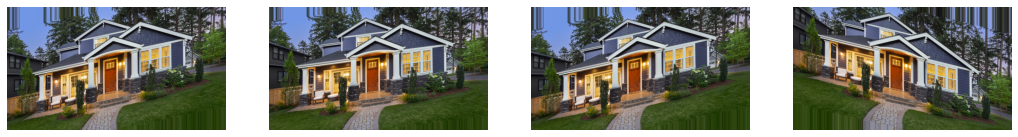

In [18]:
# plotting images
plot(data_generator)

## Zoom

`zoom_range` - A zoom less than 1.0 magnifies the image, where as zoom greater than 1.0 zooms out the image, zoom_range provides that random zoom paramter.

In [19]:
# defining data generator
data_generator = ImageDataGenerator(zoom_range=[0.5, 1.5])

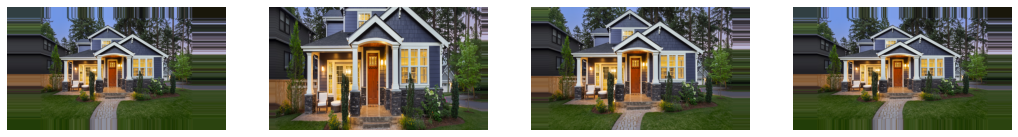

In [20]:
# plotting images
plot(data_generator)

## Vertical Flip

`vertical_flip` - Unlike rotation where the angle of the image changes, here one axis is fixed and the image is stretched at a shear angle. Shear_range specifies the agnel of the slant in degrees.

In [21]:
# defining data generator
data_generator = ImageDataGenerator(vertical_flip=True)

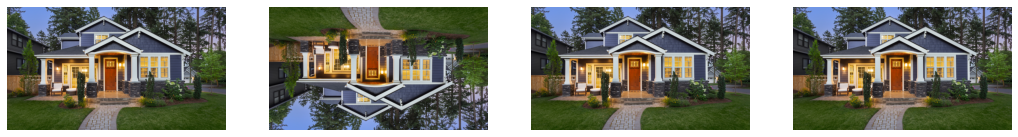

In [22]:
# plotting images
plot(data_generator, 4)

## Convert Image to Gray Scale

In [23]:
# creating function to convert images to gray
# parameters in the array are: 0.2989 * Red + 0.5870 * Green + 0.1140 * Blue
def color2gray(img):
    return np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])

In [24]:
# applying image to the function
gray = color2gray(image)

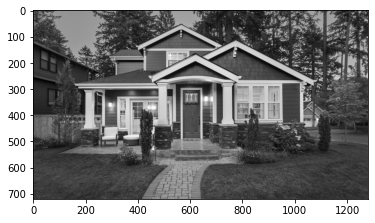

In [25]:
# showing new image
imshow(gray, cmap=plt.get_cmap('gray'))
show()